In [1]:
%%capture
import numpy as np
import pickle
from IPython.display import display
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(r"../../Data")
from dataloader import Data

val_folders = [
    "../../Data/Processed/val/epidural",
    "../../Data/Processed/val/intraparenchymal",
    "../../Data/Processed/val/subarachnoid",
    "../../Data/Processed/val/intraventricular",
    "../../Data/Processed/val/subdural",
    "../../Data/Processed/val/nohem",    
]
data=Data(val_folders, {
                "epidural":"any", 
                "intraparenchymal":"any", 
                "subarachnoid":"any", 
                "intraventricular":"any", 
                "subdural":"any", 
            }, maximum_per_folder = (-100,None),  tl_model = "alexnet", in_channels=3
)

In [2]:
import torch.nn.functional as F
import torch

def getRandomImg():
    path = r"../../Data/Processed2/"
    idx = np.random.randint(len(data))
    file = data.files[idx]
    img, label = data[idx]
    
    return file, label

def showTLImg(path):
    path = r"../../Data/Processed2/alexnet-3-" + path
    unpickled = pickle.load(open(path, "rb"))
    array = unpickled.cpu().clone().numpy()
    for img in array:
        plt.imshow(img, cmap="bone")

def showRawImg(img):
    folder = r"../../Data/dataset/stage_1_train_images"
    img_path = os.path.join(folder, img)
    unpickled = pickle.load(open(img_path, "rb"))
    plt.imshow(unpickled, cmap="bone")  

def showProcessedImg(_img):
    for folder in val_folders:
        imgs = [img for img in os.listdir(folder)]
        if _img in imgs:
            break
    
    img_path = os.path.join(folder, _img)
    unpickled = pickle.load(open(img_path, "rb"))
    plt.imshow(unpickled, cmap="bone")  

def predict(img, threshold = 0.5):
    path = r"../Models/detect_alex3, imgs=27k, bs=128, epoch=20, lr=0.0001/19_epoch.pt" 
    model=torch.load(path).cuda()
    
    path = r"../../Data/Processed2/alexnet-3-" + img
    unpickled = pickle.load(open(path, "rb"))
    
    result = torch.sigmoid(model(unpickled))
    
    if result <= threshold:
        print("> Hem")
    else:
        print("> No Hem")
    
    return float(result)

def error(prediction, label):
    
    err= round(100*abs(prediction-label),2)
    
    print("Prediction error of {}".format(err))

---
# Detetctor

# 1. Pick Img

In [12]:
img,label = getRandomImg()
img

'ID_da8362fd6.pickle'

# 2. Process

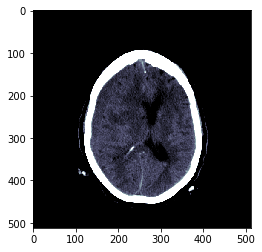

In [13]:
showProcessedImg(img)

---
# 3. Apply Transfer Learning  - AlexNet

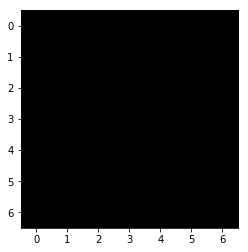

In [14]:
showTLImg(img)

# 4. Predict

In [15]:
result=predict(img, threshold=0.5)
error(result, label)

> Hem
Prediction error of 0.0
